In [135]:
%matplotlib inline
from __future__ import division                                                 
import matplotlib.pyplot as plt                                                 
import scipy.optimize as op
from scipy.optimize import fmin_cg, fmin_bfgs, fmin_ncg, fmin
from mpl_toolkits.mplot3d import Axes3D
import numpy as np                                                              
import pandas as pd 

In [136]:
def plotData(X, y, f):
    plt1 = f.add_subplot(111)
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    plt1.scatter(X[pos, 0], X[pos, 1], marker='x', color='r')
    plt1.scatter(X[neg, 0], X[neg, 1], marker='o', color='y')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(('y=1', 'y=0'), loc='lower left', fontsize=8, ncol=3, bbox_to_anchor=(0, -0.3))

In [137]:
def sigmoid(z):
    g = np.zeros(len(z))
    g = 1 / (1 + np.exp(-z))
    return g

In [138]:
def mapFeature(X1, X2):
    degree = 6
    if not X1.shape:
        l = 1
    else: 
        l = X1.shape[0]
    out = np.ones((l, 1))
    for i in range(1,degree+1):
        for j in range(0, i+1):
            out = np.hstack((out, (pow(X1, (i-j))*pow(X2, j)).reshape(l, 1)))
    return out

In [139]:
def costFn(theta, X, y, m, lam):
    h = sigmoid(X.dot(theta))
    theta0 = theta
    J = 1.0 / m * np.sum((-(y * np.log(h))) - ((1-y) * np.log(1-h))) + (lam/(2*m) * theta0.T.dot(theta0))
    return J#.flatten()
    #gg = 1 / m * ((X.T.dot(h-y)) + (lam * theta0))

In [140]:
def grad(theta, X, y, m, lam):
    theta = theta.reshape(X.shape[1], 1)
    h = sigmoid(X.dot(theta))
#     print 'theta shape'
#     print(theta.shape)
    theta0 = theta
#     print 'h-y shape'
#     print((h-y).shape)
#     print 'lam * theta0 shape'
#     print((lam*theta0).shape)
    gg = 1.0 / m * ((X.T.dot(h-y)) + (lam * theta0))
    return gg.flatten()

In [141]:
def plotDecisionBoundary(theta, X, y):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    #uu, vv = np.meshgrid(u, v)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = (mapFeature(np.array(u[i]), np.array(v[j]))).dot(np.array(theta))

    z = z.T
    f = plt.figure()
    plt2 = f.add_subplot(111)
    plt2.contour(u, v, z)#, vmin=0, vmax=0)
    S = np.concatenate((x1, x2), axis=1)
    plotData(S, y, f)
    plt.show()

In [142]:
def predict(theta, X, m):
    p = np.zeros(m).reshape(m ,1)
    p = sigmoid(X.dot(theta)) >= 0.5
    p = p.astype(int)
    return p


Plotting data


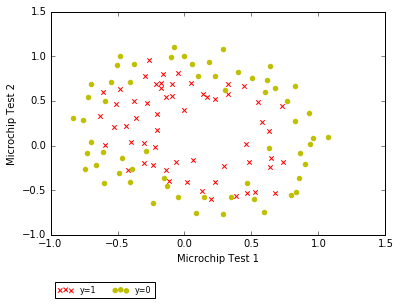

(118, 28)
(118, 1)
Cost at initial theta (zeros): [ 0.69314718]
grad: 
0.008475
0.018788
0.000078
0.050345
0.011501
0.037665
0.018356
0.007324
0.008192
0.023476
0.039349
0.002239
0.012860
0.003096
0.039303
0.019971
0.004330
0.003386
0.005838
0.004476
0.031008
0.031031
0.001097
0.006316
0.000409
0.007265
0.001376
0.038794
Optimization terminated successfully.
         Current function value: 0.535160
         Iterations: 20
         Function evaluations: 1770
         Gradient evaluations: 59


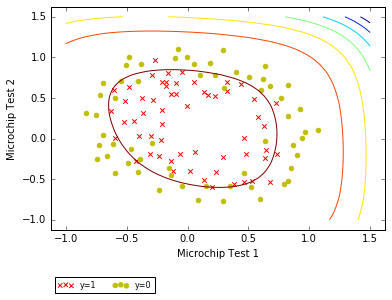

Training accuracy:  49.8850904912


In [143]:
# ============================================== Plot data ==============================================  #
data = pd.read_csv('ex2data2.txt', sep=",", header=None)                        
data.columns = ['x1', 'x2', 'y']                                                       
x1 = data.iloc[:, 0].values[:, None]                                                     
x2 = data.iloc[:, 1].values[:, None]                                                    
y = data.iloc[:, 2].values[:, None]

# join x1 and x2 to make one array of X
X = np.concatenate((x1, x2), axis=1)

m, n = X.shape

print '\nPlotting data'
plotData(X, y, plt.figure())
plt.show()

# ========================================= Regularized Logistic Regression ================================ #
X1 = X[:, 0]
X2 = X[:, 1]

X = mapFeature(X1, X2)
print(X.shape)
print(y.shape)
initial_theta = np.zeros(X.shape[1]).reshape(X.shape[1], 1)
# print 'initial_theta shape'
# print(initial_theta.shape)
lam = 1
J = costFn(initial_theta, X, y, m, lam)
G = grad(initial_theta, X, y, m, lam)
print 'Cost at initial theta (zeros):', J[0]
print 'grad: '
print '\n'.join('%f' % val for val in G)

# plotDecisionBoundary(G, X, y)

# plt.hold(True)
y1 = y.flatten()
Result = op.minimize(fun = costFn, 
                    x0 = initial_theta, 
                    args = (X, y1, m, lam),
                    method = 'CG',
                    options={'disp': True})#,
                    # jac=grad)
# print(Result)
theta = Result.x
# print(theta)
# theta = theta.reshape(3, 1)
plotDecisionBoundary(theta, X, y)
# print Result.fun

# xopt = fmin_ncg(costFn, fprime=grad, x0=initial_theta, args=(X, y, m, lam), maxiter=400, disp=True, full_output=True )
# xopt = fmin_ncg(costFn, fprime=grad, x0=initial_theta, args=(X, y, m, lam), maxiter=400, disp=True, full_output=True )

# prob = sigmoid(np.array([1, 45, 85]).dot(theta))
# print 'For a student with scores 45 and 85, we predict an admission probability of %f' % prob
# X = mapFeature(X1, X2)
p = predict(theta, X, m)

print 'Training accuracy: ', np.mean((p == y))*100

In [99]:
# fig = plt.figure()
# x = np.linspace(-10, 10, 100)
# y = np.linspace(-5, 5, 100)
# X, Y = np.meshgrid(x, y)
# a = np.exp(-((X - 0) ** 2 + 3*(Y - 0) ** 2) / 4)
# c = plt.contour(x, y, a)
# plt.xlim(-10, 10)
# plt.ylim(-2, 2)
# plt.show()